# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a staged implementation is presented, as is required to successfully complete this project. No additional code is required and this is a self contained notebook.

> **Note**: An Html version of the notebook is available in the same folder

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
# Optional: Change cell width for better visualization on a wide screen display

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

---
## Step 0: Load The Data

In [2]:
import pickle
import numpy as np
from collections import Counter
import csv
import matplotlib.ticker as ticker
import cv2

# TODO: Fill this in based on where you saved the training and testing data
# Training testing and validation sets have been provided in the zip file provided
# in the Project materials so I have not split the data myself
# Set File Names

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

# Open files

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Create Feature and label Arrays

(X_train, y_train) = (train['features'], train['labels'])
(X_valid, y_valid) = (valid['features'], valid['labels'])
(X_test, y_test) = (test['features'], test['labels'])

In [3]:
# Check that data set is not empty

assert len(X_train) != 0
assert len(X_valid) != 0
assert len(X_test) != 0

# Check if data set is sane and labels and features are the same size

assert len(X_train) == len(y_train)
assert len(X_valid) == len(y_valid)
assert len(X_test) == len(y_test)


---

## Step 1: Dataset Summary & Exploration

The Pickle data set is loaded and checked for sanity. Subsequent cells describe the data exploration by means of text as well as illustrative images wherever applicable.
For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value.
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples

n_train = len(X_train)

# TODO: Number of testing examples.

n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?

image_shape = X_train[0].shape
print ('Type of list', type(X_train))
print ('Type of image', type(X_train[0]))

# TODO: How many unique classes/labels there are in the dataset.

n_classes = len(np.bincount(y_train))

print ('Number of training examples =', n_train)
print ('Number of testing examples =', n_test)
print ('Image data shape =', image_shape)
print ('Number of classes =', n_classes)

Type of list <class 'numpy.ndarray'>
Type of image <class 'numpy.ndarray'>
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt

# Visualizations are shown in the notebook.

%matplotlib inline

## Class strength
A fundamental property of training data should be a balanced distribution of points in every class. We have a total of 43 classes (labels)

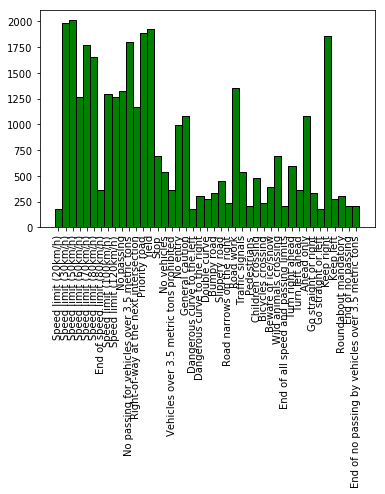

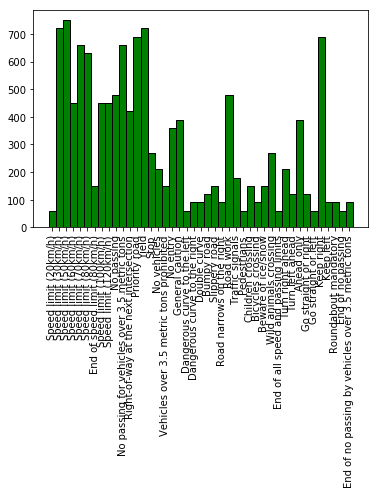

In [6]:
# Plot Class strength for each label type
# Load the csv file mapping class index to Name for better visualization

ifile = open('signnames.csv', 'rt')
reader = csv.reader(ifile)
(indices, texts) = zip(*list(reader)[1:])

# Function to plot bar graph distribution of input data

def plot_data(data):
    values = np.bincount(data)
    indexes = np.arange(len(values))
    width = 1
    plt.bar(indexes, values, width, color='g', edgecolor='black')
    plt.xticks(indexes, texts, rotation='vertical')
    plt.show()


# Plot both training and test data sets

plot_data(y_train)
plot_data(y_test)

## Conclusion
We see that certain classes are over represented and others are under-represented in our data set. This kind of a distribution might result in biasing our network unfairly. Artificially generated data should be added to the under-represented classes

# Grayscale Conversion and normalization
For a good Implementation a normalized data set is much better than a non normalized data set. 

In [7]:
# Create temporary variables to store original unnormalized images

X_train_rgb = X_train
X_test_rgb = X_test
X_valid_rgb = X_valid


# Converting the data to grayscale

X_train_grayscale = np.sum(X_train/3, axis=3, keepdims=True)
X_test_grayscale = np.sum(X_test/3, axis=3, keepdims=True)
X_valid_grayscale = np.sum(X_valid/3, axis=3, keepdims=True)

# Assigning grayscale values to the original variables

X_train = X_train_grayscale
X_test = X_test_grayscale
X_valid = X_valid_grayscale

## Normalization Equation
$$x''' = (b-a)\frac{x - \min{x}}{\max{x} - \min{x}} + a$$

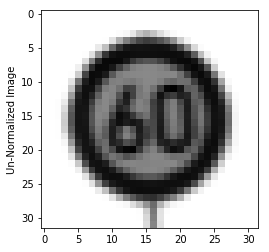

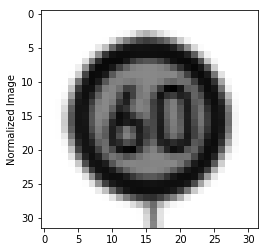

184.317708333
0.445629084967


In [8]:
# Normalization parameters
b = 1.
a = -1.
min_val = 0.
max_val = 255.


X_normal_train = (b-a)*(X_train - min_val)/(max_val - min_val) + a
X_normal_test = (b-a)*(X_test - min_val)/(max_val - min_val) + a
X_normal_valid = (b-a)*(X_valid - min_val)/(max_val - min_val) + a

# Show image 
index = np.random.randint(0,len(X_normal_train))
plt.ylabel('Un-Normalized Image')
plt.imshow(X_train[index].squeeze(),cmap='gray')
plt.show()

# Show image

plt.ylabel('Normalized Image')
plt.imshow(X_normal_train[index].squeeze(),cmap='gray')
plt.show()

# Print mean before and after normalization

print (np.mean(X_train[index]))
print (np.mean(X_normal_train[index]))

## Conclusion
We have successfully normalized the data in the range (-1,1)


## Data Distribution
Label data should be plotted to check for distribution of labels to check for requirement of shuffling

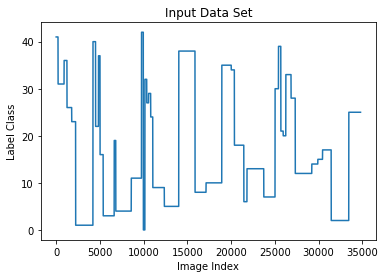

In [9]:
# Plot distribution of labels by index. Each index represents a class label

plt.plot(y_train)
plt.xlabel('Image Index')
plt.ylabel('Label Class')
plt.title('Input Data Set')

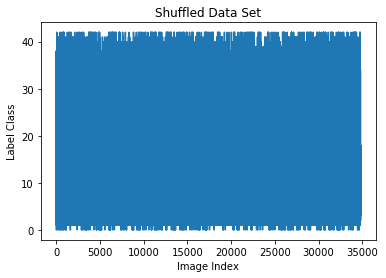

In [10]:
# Shuffle the data once

from sklearn.utils import shuffle
X_normal_train,y_train = shuffle(X_normal_train,y_train)

# Replot to verify shuffling

plt.plot(y_train)
plt.xlabel('Image Index')
plt.ylabel('Label Class')
plt.title('Shuffled Data Set')

## Conclusion
The Large number of horizontal edges in the data indicates that the data is sorted by class labels. All the labels of one type are clustered together. Data is shuffled once here. We will reshuffle this data during training for better results

# Visualization interpretation
The Visualization leads to the following interpretations:
    * Speed limit inputs are over represented in both training and test sets and would bias the classifier. This is not a desirable outcome so some balancing of data needs to be achieved. Under-represented classes should be oversampled by adding points to the training set that are mutated versions of the input set.
    * Data was of int type in range 0,255 on three axis(r,g,b). It was converted to grayscale and floating point range between (-1,1)
    * Data was found to be clustered by class labels. Data was shuffled to represent uniformed distribution. We should reshuffle the data during the training operation.
    

## Class oversampling
As discovered in the data visualization step, under represented classes should be oversampled/supersampled with random mutations of the input data

In [11]:
# Function to randomly translate an image


def random_translate(img):
    (img_rows, img_columns) = (img.shape[0], img.shape[1])

    # Randomly translate between known range to mutate image
    
    (dx, dy) = np.random.randint(-4, 4, 2)
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    dst = cv2.warpAffine(img, M, (img_rows, img_columns))
    dst = dst[:, :, np.newaxis]

    return dst


In [12]:
# Function to randomly scale an image

def random_scaling(img):
    (img_rows, img_columns) = (img.shape[0], img.shape[1])

    # Randoml scale factor

    scale_factor = np.random.randint(-2, 2)

    # Four Corners that will be come the new corners after random warping

    pts1 = np.float32([[scale_factor, scale_factor], [img_rows
                      - scale_factor, scale_factor], [scale_factor,
                      img_columns - scale_factor], [img_rows
                      - scale_factor, img_columns - scale_factor]])

    # Original 4 corners

    pts2 = np.float32([[0, 0], [img_rows, 0], [0, img_columns],
                      [img_rows, img_columns]])

    # Apply Perspective transform to mutate image

    M = cv2.getPerspectiveTransform(pts1, pts2)
    dst = cv2.warpPerspective(img, M, (img_rows, img_columns))
    dst = dst[:, :, np.newaxis]

    return dst


In [13]:
# Class to implement a simple text based Progress bar to indicate progress of the dataset augmentation function
# Note: This class is not my code. Someone was kind enough to lend me his code to use Since this is not a critical
# part of the Project learnings and is only a convenience tool to let me know when data augmentation is complete, 
# I hope it won't be a problem

import time

class ProgressBar:

    def __init__(self, loop_length):
        import time
        self.start = time.time()
        self.increment_size = 100.0 / loop_length
        self.curr_count = 0
        self.curr_pct = 0
        self.overflow = False
        print('% complete: ', end='')
    
    def increment(self):
        self.curr_count += self.increment_size
        if int(self.curr_count) > self.curr_pct:
            self.curr_pct = int(self.curr_count)
            if self.curr_pct <= 100:
                if self.curr_pct%10 == 0:
                    print(self.curr_pct, end=' ')
            elif self.overflow == False:
                print("\n* Count has gone over 100%; likely either due to:\n  - an error in the loop_length specified when " + \
                      "progress_bar was instantiated\n  - an error in the placement of the increment() function")
                print('Elapsed time when progress bar full: {:0.1f} seconds.'.format(time.time() - self.start))
                self.overflow = True

    def finish(self):
        if 99 <= self.curr_pct <= 100: # rounding sometimes makes the maximum count 99.
            print("100", end=' ')
            print('\nElapsed time: {:0.1f} seconds.\n'.format(time.time() - self.start))
        elif self.overflow == True:
            print('Elapsed time after end of loop: {:0.1f} seconds.\n'.format(time.time() - self.start))
        else:
            print('\n* End of loop reached earlier than expected.\nElapsed time: {:0.1f} seconds.\n'.format(time.time() - self.start))

# Data Augmentation
As Discussed earlier certain classes such as speed limits are over represented in the data while others are underrepresented. Random mutation will be applied to the under-represented classes to increase their numerical strength as a percentage of total data. Since this is a time consuming process, it would be wasteful to repeat it every time the notebook is restarted. The augmented data is saved to file as a pickle dump so that it can simply be loaded from file the next time this cell is run. If the file doesn't exist , the oversampling and random mutation process needs to be repeated

In [14]:
import os
import pandas as pd

# File name to save and load augmented data
fname = 'normalized_train.p'

# If file Exists, load as pandas series object
# Else oversample and augment
if os.path.isfile(fname) :
    with open(fname, mode='rb') as f:
        normalized_augmented_train = pickle.load(f)
    (X_normal_train, y_train) = (normalized_augmented_train['features'], normalized_augmented_train['labels'])
    y_train = y_train[0]
    X_normal_train = X_normal_train[0]
else:
    input_indices = []
    output_indices = []
    
    # For Each class
    for class_n in range(n_classes):
        print('Label -', texts[class_n], ': ', end='')
        class_indices = np.where(y_train == class_n)
        n_samples = len(class_indices[0])
        pbar = []
        min_class_size = 800

        pbar = ProgressBar(max(1,min_class_size - n_samples))

        if n_samples < min_class_size:
            for i in range(min_class_size - n_samples):
                input_indices.append(class_indices[0][i%n_samples])
                output_indices.append(X_normal_train.shape[0])
                new_img = X_normal_train[class_indices[0][i % n_samples]]
                new_img = random_translate(random_scaling(new_img))
                X_normal_train = np.concatenate((X_normal_train, [new_img]), axis=0)
                y_train = np.concatenate((y_train, [class_n]), axis=0)
                pbar.increment()
        print('')
    normalized_balanced = pd.DataFrame({'features' : [X_normal_train], 'labels' : [y_train]}, columns=['features','labels'])
    pickle.dump( normalized_balanced, open( fname, "wb" ))
    

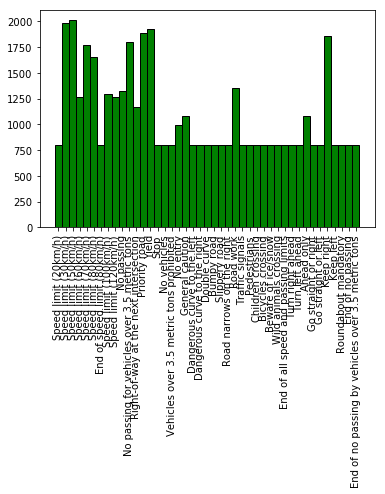

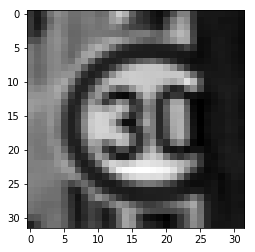

In [15]:
# Replot Class strength after augmentation to verify

plot_data(y_train)
plt.show()
plt.imshow(X_normal_train[np.random.randint(0,len(X_normal_train))].squeeze(),cmap='gray')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

This section has been completed during the data visualization steps. Proper explanation has also been provided. As a summary, the following actions have been performed to prepare the dataset:
    * Conversion to Grayscale
    * Normalization to (-1,1)
    * Shuffling of data set
    * Augmentation by oversampling of the under represented labels

In [16]:
# Import tensorflow and define batch size and epochs

import tensorflow as tf
import numpy as np

EPOCHS = 1000
BATCH_SIZE = 128

### Model Architecture
I implemented the approach described by Lecun et al. in "Traffic Sign Recognition with Multi-Scale Convolutional Networks"
The architecture is illustrated and specified in the image below
![Model Architecture](./writeup_helpers/architecture/architecture.001.jpeg)

In [17]:
# Create Convolutional Layer

## Parameters
# input_features: input to layer
# input_depth: depth of input
# output_depth: desired depth
# filter_width: Convolutional filter Width
# filter_height: Convolutional filter height
# desired_strides: strides
# desired_padding: padding type
# mu: mean for initial weights
# sigma: standard deviation for initial weights

import cv2
def create_convolutional_layer(
    input_features,
    input_depth,
    output_depth,
    filter_width,
    filter_height,
    desired_strides,
    desired_padding,
    mu,
    sigma,
    ):
    biases = tf.Variable(tf.zeros((output_depth)))
    weights = tf.Variable(tf.truncated_normal(shape=(filter_width, filter_height, input_depth,
                          output_depth), mean=mu, stddev=sigma))
    conv_layer = tf.nn.conv2d(input_features, weights, strides=desired_strides,
                              padding=desired_padding) + biases
    return conv_layer


In [18]:
def traffic_sign_net(x):

    # Hyperparameters

    mu = 0
    sigma = 0.1
    desired_padding_valid = 'VALID'
    desired_padding_same = 'SAME'
    mu = 0
    sigma = 0.1

    with tf.device('/gpu:0'):

        input_depth = 1
        depth_1 = 6
        filter_shape_1 = [5, 5]

        # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6
        layer_1 = create_convolutional_layer(
            x,
            input_depth,
            depth_1,
            filter_shape_1[0],
            filter_shape_1[1],
            [1, 1, 1, 1],
            desired_padding_valid,
            mu,
            sigma,
            )

        # Activate Using Relu
        act1 = tf.identity(tf.nn.relu(layer_1), name='activation_1')
        tf.add_to_collection('vars', act1)

        # Pooling (2x2) Input = 28x28x6. Output = 14x14x6
        pool_1 = tf.nn.max_pool(act1, ksize=[1, 2, 2, 1], strides=[1,
                                2, 2, 1], padding='VALID')

        print ('Layer 1 shape:', pool_1.get_shape())

        
        # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16
        depth_2 = 16
        filter_shape_2 = [5, 5]

        layer_2 = create_convolutional_layer(
            pool_1,
            depth_1,
            depth_2,
            filter_shape_2[0],
            filter_shape_2[1],
            [1, 1, 1, 1],
            desired_padding_valid,
            mu,
            sigma,
            )

        # Activate Using Relu
        act2 = tf.identity(tf.nn.relu(layer_2), name='activation_2')
        tf.add_to_collection('vars', act2)

        # Pooling (2x2) Input = 10x10x16. Output = 5x5x16
        pool_2 = tf.nn.max_pool(act2, ksize=[1, 2, 2, 1], strides=[1,
                                2, 2, 1], padding='VALID')
        
        print ('Layer 2 shape:', pool_2.get_shape())

        depth_3 = 400
        filter_shape_3 = [5, 5]

        # Layer 3: Convolutional. Input = 5x5x6 Output = 1x1x400
        layer_3 = create_convolutional_layer(
            pool_2,
            depth_2,
            depth_3,
            filter_shape_3[0],
            filter_shape_3[1],
            [1, 1, 1, 1],
            desired_padding_valid,
            mu,
            sigma,
            )

        # Activate Using Relu
        act3 = tf.identity(layer_3, name='activation_3')
        tf.add_to_collection('vars', act3)
        
        print ('Layer 3 Shape', act3.get_shape())

        # Flatten Convolutional layer 2
        layer_2_flat = flatten(pool_2)
        print ('Flattened Layer 2 shape:', layer_2_flat.get_shape())

        # Flatten Convolutional layer 3
        layer_3_flat = flatten(act3)
        print ('Flattened Layer 3 shape:', layer_2_flat.get_shape())

        # Concatenate layers
        concat_layer = tf.concat([layer_3_flat, layer_2_flat], 1)
        print ('Concatenated shape:', concat_layer.get_shape())

        # Dropout
        concat_dropout = tf.nn.dropout(concat_layer, keep_prob)

        # Layer 4: Fully Connected. Input = 800. Output = 43.

        weights_fc = \
            tf.Variable(tf.truncated_normal(shape=(concat_layer.get_shape().as_list()[1],
                        n_classes), mean=mu, stddev=sigma))
            
        biases_fc = tf.Variable(tf.zeros(43))
        
        logits = tf.identity(tf.add(tf.matmul(concat_dropout,
                             weights_fc), biases_fc), name='logits')
        
        tf.add_to_collection('vars', logits)

        return (act1, act2, act3, logits)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Train your model here.

In [19]:
# Create Placeholders for training set

tf.reset_default_graph()
with tf.device('/gpu:0'):
    x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, 43)
    keep_prob = tf.placeholder(tf.float32) 

In [20]:
from tensorflow.contrib.layers import flatten

# Setup the Training Pipeline

rate = 0.0005
with tf.device('gpu:0'):

    # Get Logits and activation layers
    # activation layers are returned for featuremap visualization later on

    (act1, act2, act3, logits) = traffic_sign_net(x)
    
    # Using softmax cross entropy
    cross_entropy = \
        tf.nn.softmax_cross_entropy_with_logits(logits=logits,
            labels=one_hot_y)

    # Loss is calculated as reduced mean of cross entropy
    loss_operation = tf.reduce_mean(cross_entropy)
    
    # Using the super efficient adam optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=rate)
    
    # Training is built on loss minization
    training_operation = optimizer.minimize(loss_operation)

Layer 1 shape: (?, 14, 14, 6)
Layer 2 shape: (?, 5, 5, 16)
Layer 3 Shape (?, 1, 1, 400)
Flattened Layer 2 shape: (?, 400)
Flattened Layer 3 shape: (?, 400)
Concatenated shape: (?, 800)


In [21]:
# Evaluate the Model

# Prediction operation implies that the ouptut matrix should be a one hot encoded form of labels
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# initialize saver to save model
saver = tf.train.Saver()

# Evaluate accuracy
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [22]:
# Train the model
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    # Initialize Variables
    sess.run(tf.global_variables_initializer())
    
    num_examples = len(X_normal_train)
    
    # Empty list to store loss values 
    loss_val = []
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_normal_train, y_train = shuffle(X_normal_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_normal_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_normal_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        loss_val.append(1.0 - validation_accuracy)
        print()
    # Save the Model    
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.715

EPOCH 2 ...
Validation Accuracy = 0.807

EPOCH 3 ...
Validation Accuracy = 0.830

EPOCH 4 ...
Validation Accuracy = 0.878

EPOCH 5 ...
Validation Accuracy = 0.887

EPOCH 6 ...
Validation Accuracy = 0.896

EPOCH 7 ...
Validation Accuracy = 0.913

EPOCH 8 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Validation Accuracy = 0.907

EPOCH 10 ...
Validation Accuracy = 0.924

EPOCH 11 ...
Validation Accuracy = 0.915

EPOCH 12 ...
Validation Accuracy = 0.929

EPOCH 13 ...
Validation Accuracy = 0.932

EPOCH 14 ...
Validation Accuracy = 0.929

EPOCH 15 ...
Validation Accuracy = 0.932

EPOCH 16 ...
Validation Accuracy = 0.928

EPOCH 17 ...
Validation Accuracy = 0.932

EPOCH 18 ...
Validation Accuracy = 0.929

EPOCH 19 ...
Validation Accuracy = 0.931

EPOCH 20 ...
Validation Accuracy = 0.929

EPOCH 21 ...
Validation Accuracy = 0.937

EPOCH 22 ...
Validation Accuracy = 0.935

EPOCH 23 ...
Validation Accuracy = 0.931

EPOCH 24 ...
Validation Accura

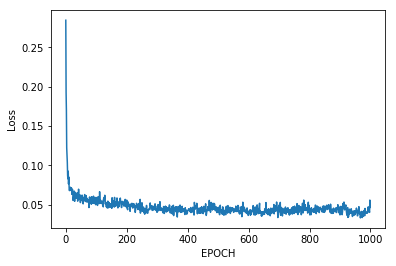

In [23]:
# Plot the Loss
plt.plot(loss_val)
plt.xlabel("EPOCH")
plt.ylabel("Loss")

## Results

In [24]:
# Evaluate the accuracy on the test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_normal_train, y_train)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


In [25]:
# Evaluate the accuracy on the test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_normal_valid, y_valid)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.955


In [26]:
# Evaluate the accuracy on the test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_normal_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.937


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

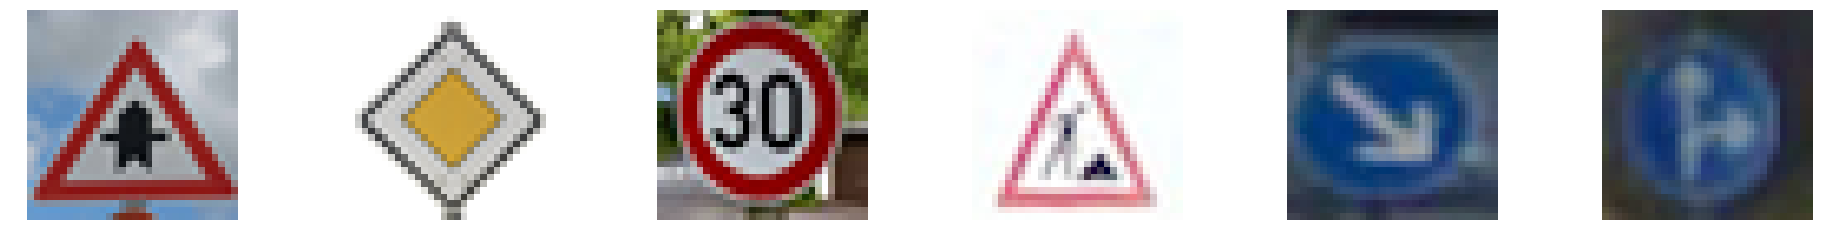

In [27]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#reading in an image
import os

fig, axes = plt.subplots(1,6, figsize=(32, 32))
fig.subplots_adjust(hspace = .5, wspace=.5)
axes = axes.ravel()

random_images = []

for i, img in enumerate(os.listdir('new_images/')):
    image = cv2.imread('new_images/' + img)
    axes[i].axis('off')
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    random_images.append(image)

random_images = np.asarray(random_images)

random_images_grayscale = np.sum(random_images/3, axis=3, keepdims=True)

random_images_normalized = -1 + 2*(random_images_grayscale )/255. 


### Predict the Sign Type for Each Image

In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [29]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [30]:
random_labels = [11, 12, 1, 25, 38,36]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(random_images_normalized, random_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 1.000


### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

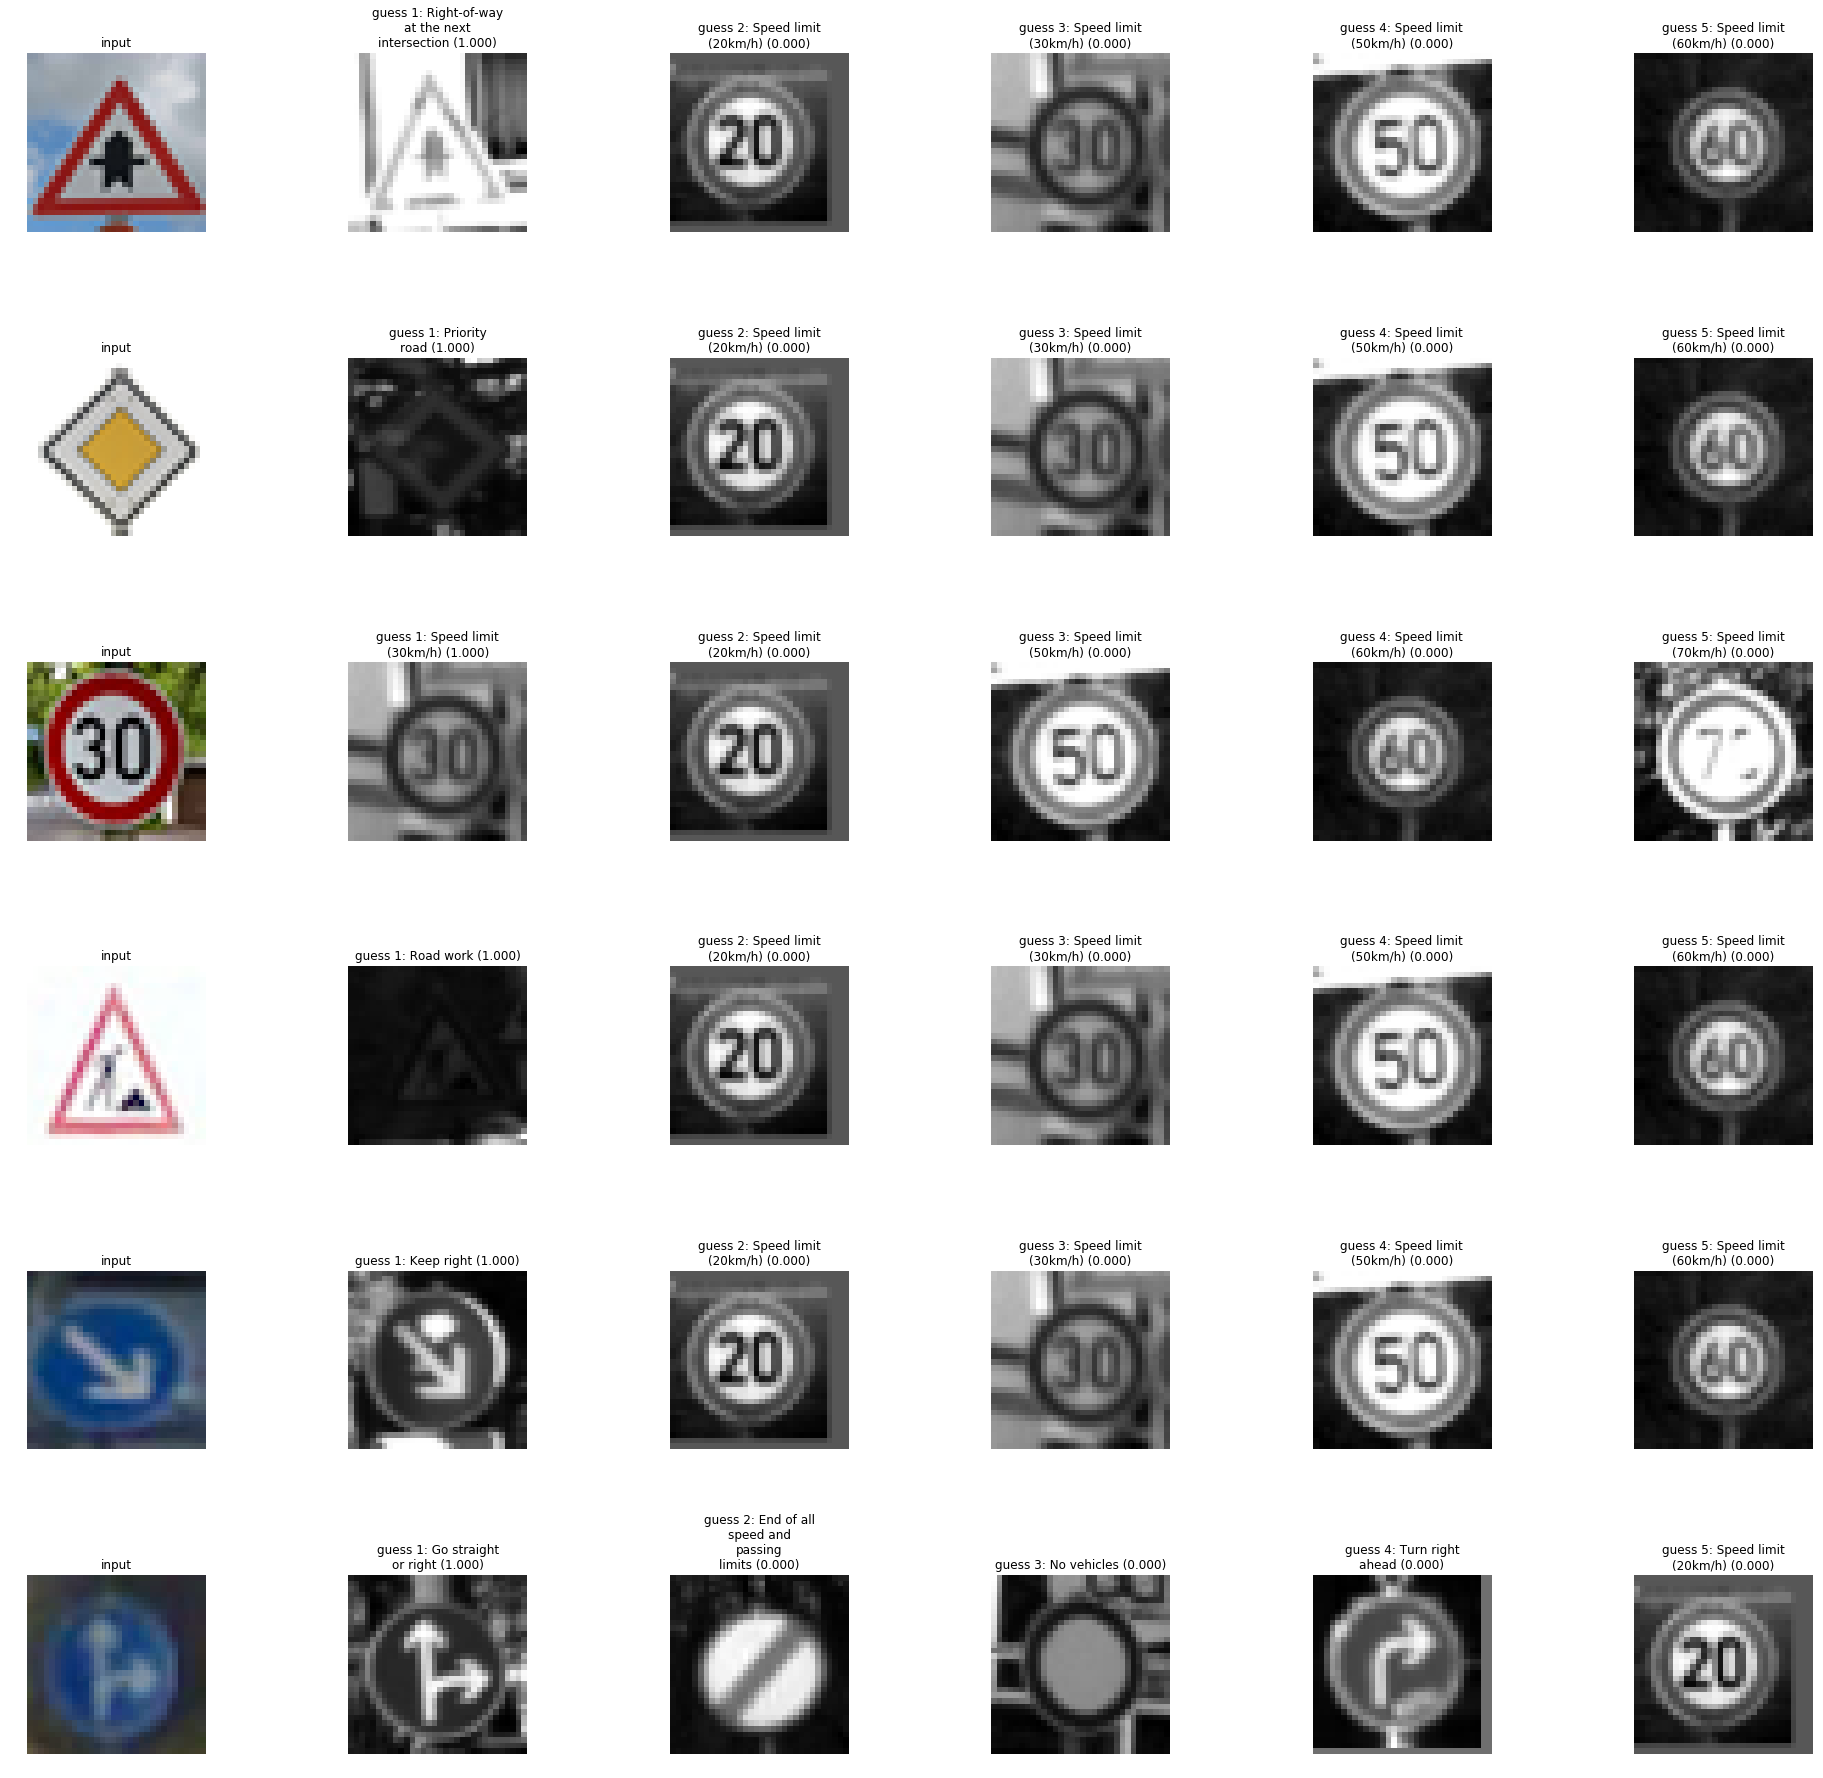

In [31]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)
from textwrap import wrap

texts = [ '\n'.join(wrap(l, 12)) for l in texts ]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: random_images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: random_images_normalized, keep_prob: 1.0})

    
    fig, axes = plt.subplots(len(random_images),6, figsize=(32, 32))
    fig.subplots_adjust(hspace = .40, wspace=.80)
    axes = axes.ravel()

    for i, image in enumerate(random_images):
        axes[6*i].axis('off')
        axes[6*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[6*i].set_title('input')
        for j in range(5):
            guess = my_top_k[1][i][j]
            index = np.argwhere(y_train == guess)[0]
            axes[6*i+j+1].axis('off')
            axes[6*i+j+1].imshow(X_normal_train[index].squeeze(), cmap='gray')
            axes[6*i+j+1].set_title('guess {}: {} ({:.3f})'.format(j+1,texts[guess], my_top_k[0][i][j]))

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [32]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

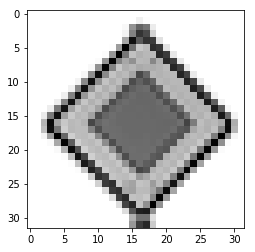

In [33]:
image_input = random_images_normalized[np.random.randint(0,len(random_images_normalized))]
plt.imshow(np.reshape(image_input,[32,32]), interpolation="nearest", cmap="gray")

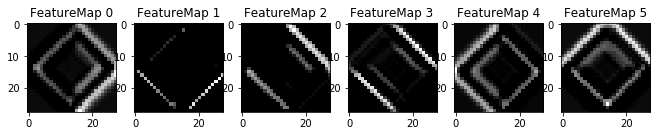

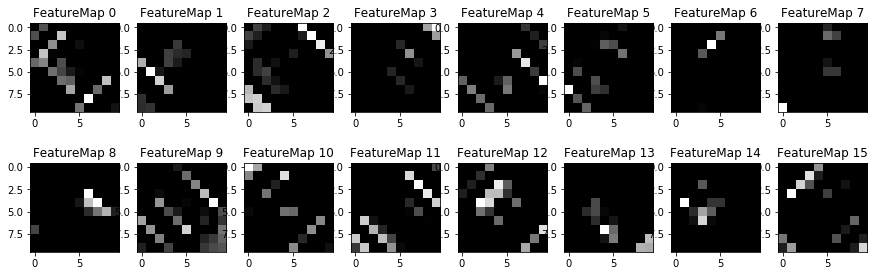

In [34]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    outputFeatureMap([image_input],act1)
    plt.show()
    outputFeatureMap([image_input],act2)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:** I started off with the original Lenet architecture and compared visually the feature maps the first and the second layers between traffic signs that could possibly be confused with each other for example the speed limit signs of 30 and 60 kmph. 


* Output of layer looks like various gradient threshold maps with peaks and troughs around the pixel regions where sharp intensity variation is present !["60kmph"](./writeup_helpers/60kph.png) 
* Output of Layer 2 looks like a multiscale edgemap representation of layer 1 output !["30kmph"](./writeup_helpers/30kmph.png)


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 